# Healthcare Diabetes Prediction

##### This project aim to predict if patient is diabetes or not, using multiple machine learning algorithm. By analyzing historical data and employing various model, we seek to identify the most accurate and reliable method for predicting daibetes outcome.

##### The analysis is based on data sourced from Kaggle, specifically the Healthcare Diabetes Dataset available at https://www.kaggle.com/datasets/nanditapore/healthcare-diabetes/data

The Machine Learning Models:
1. Logistic Regression
2. Support Vector Classifier (SVC)
3. Naive Bayes
4. K-Nearest Neighbors (KNN)
5. Decision Tree 
6. Random Forest 
7. XGB Classifier

## Step 0: Import Libraries

In [4]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.filterwarnings("ignore")

## Step 1: Import Data

In [6]:
#Read dataset
df=pd.read_csv("Healthcare-Diabetes.csv")

In [7]:
# Check data frame
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


**Outcome 0 = not have diabetes**

**Outcome 1 = have diabetes**

## Step 2: Data Exploration

In [8]:
# Get general Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [9]:
# Get columns name
df.columns

Index(['Id', 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
# Check Statisical
df.describe().astype(int)

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768,2768,2768,2768,2768,2768,2768,2768,2768,2768
mean,1384,3,121,69,20,80,32,0,33,0
std,799,3,32,19,16,112,8,0,11,0
min,1,0,0,0,0,0,0,0,21,0
25%,692,1,99,62,0,0,27,0,24,0
50%,1384,3,117,72,23,37,32,0,29,0
75%,2076,6,141,80,32,130,36,0,40,1
max,2768,17,199,122,110,846,80,2,81,1


## Step 3: Data Cleaning & Processing

In [11]:
# Check NaN values
df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [12]:
# Check duplicate
df.duplicated().sum()

0

In [13]:
# Check shape (nb of row, nb of column)
df.shape

(2768, 10)

**As we see in this step neither NaN value nor duplicated**

## Step 4: Exporatory Data Analysis (EDA)

### 4.1. Target Analysis

In [14]:
# Check Outcome columns
df["Outcome"].value_counts()

Outcome
0    1816
1     952
Name: count, dtype: int64

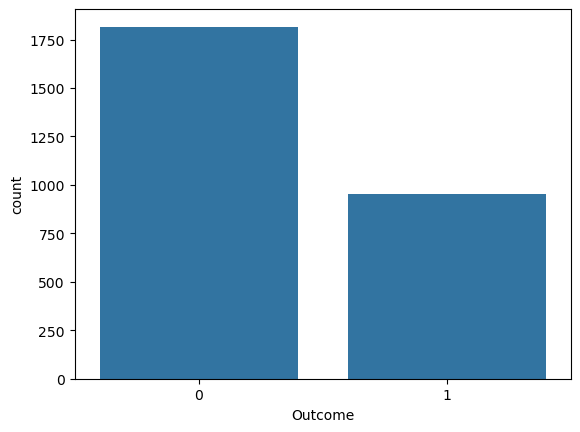

In [15]:
sns.countplot(data=df, x='Outcome')
plt.show()

In [16]:
# Check % of diabetes to total data
(df["Outcome"].value_counts()[1] / df.shape[0]) * 100

34.39306358381503

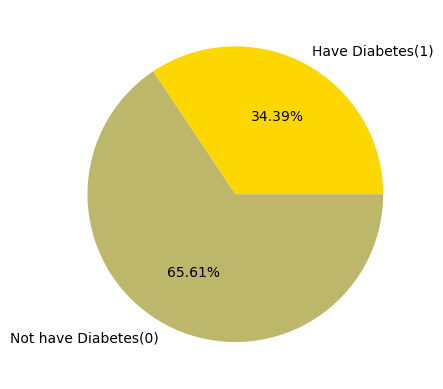

In [17]:
# % of customer who exited or not

# Data foe pie chart
counts = df['Outcome'].value_counts().values
trans_counts = [counts[1], counts[0]]
trans_labels = ["Have Diabetes(1)", "Not have Diabetes(0)"]

# Create pie chart
plt.pie(trans_counts, labels=trans_labels, autopct = '%1.2f%%', colors=['gold', 'darkkhaki'])
plt.show()

### 4.2. Continuous Variables Analysis

In [18]:
numeric_coloumns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

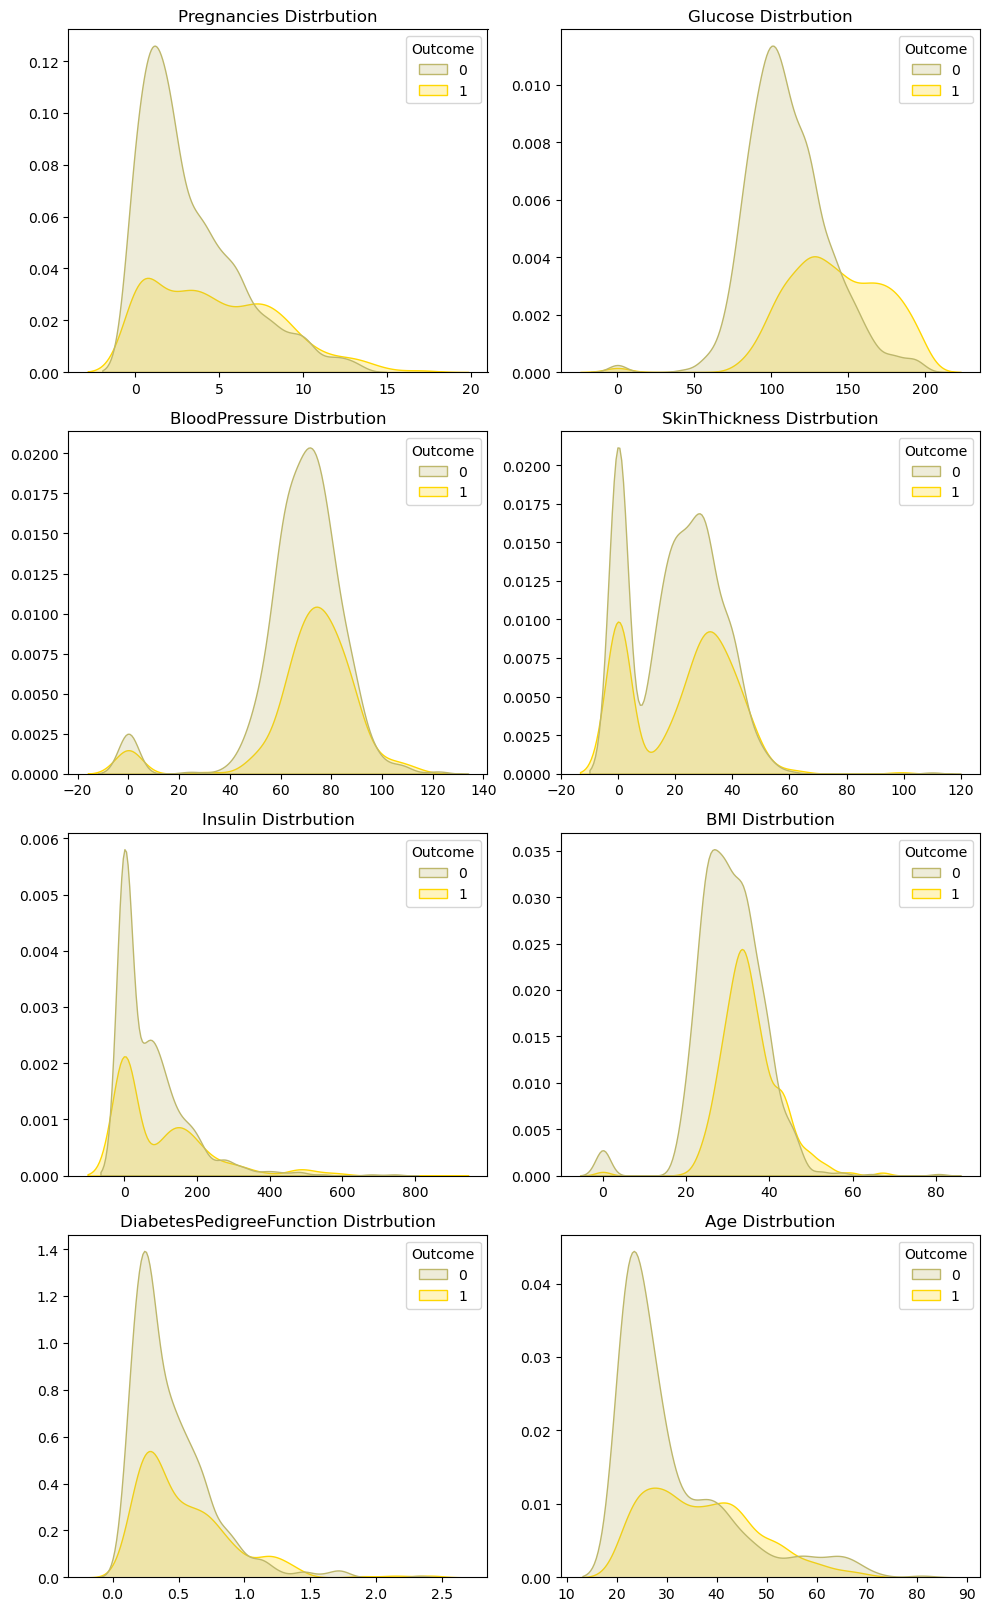

In [19]:
fig = plt.figure(figsize=(10,20))

for i, col in enumerate (numeric_coloumns):
    ax = fig.add_subplot(5, 2, i+1)
    sns.kdeplot(data = df, x = col, axes = ax,
                hue = 'Outcome', hue_order = [0,1],
                fill = True, palette = ['darkkhaki', 'gold'])
    ax.set_title(f"{col} Distrbution")
    ax.set(xlabel = None, ylabel = None)

fig.tight_layout()
plt.show()

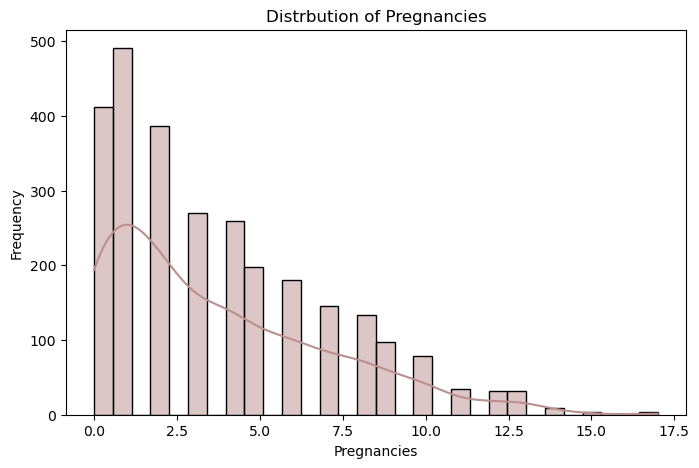

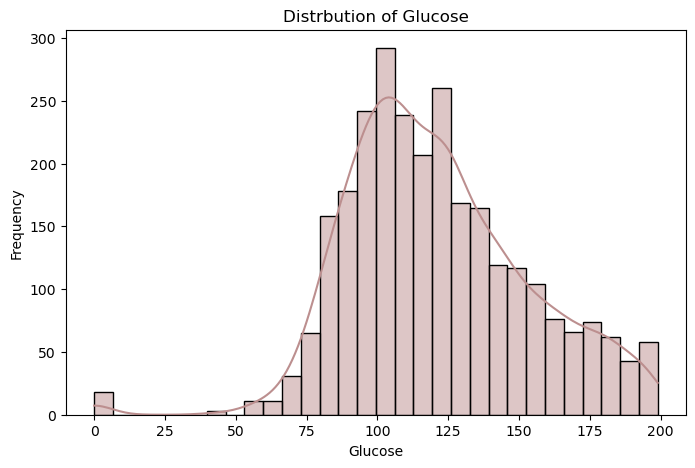

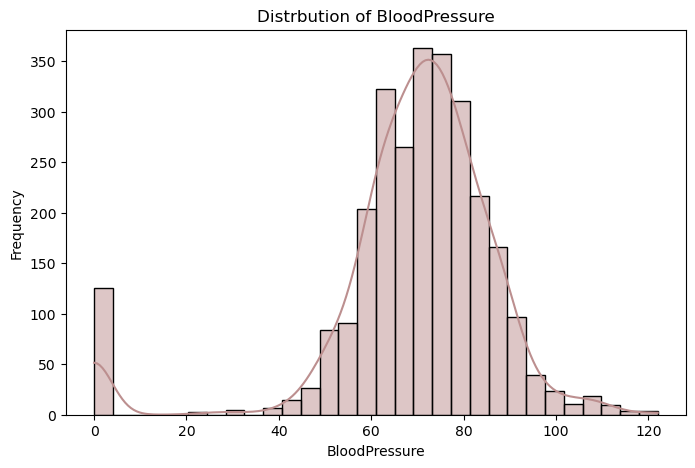

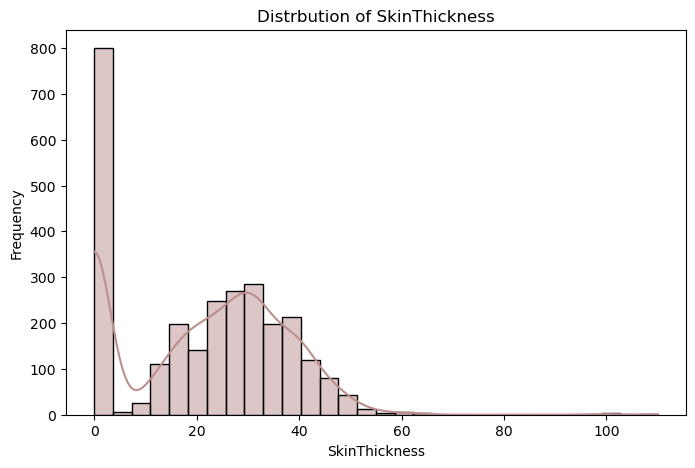

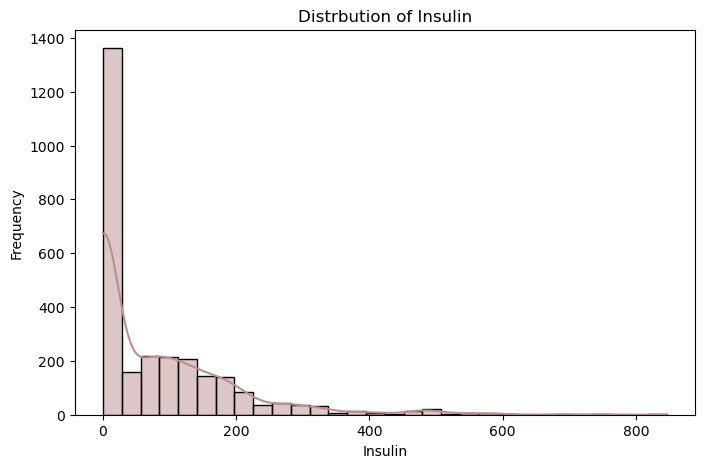

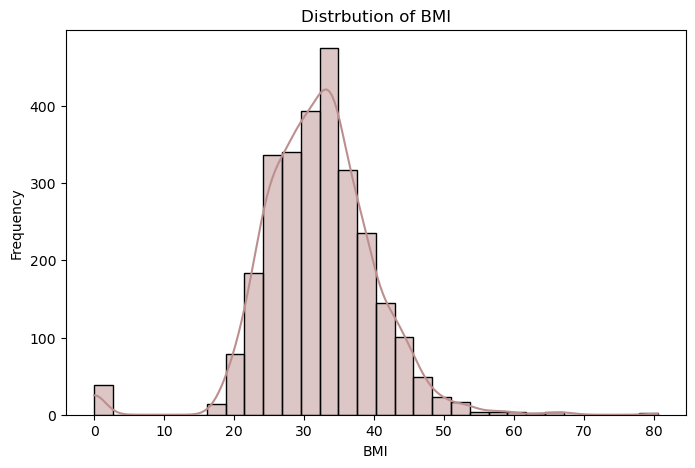

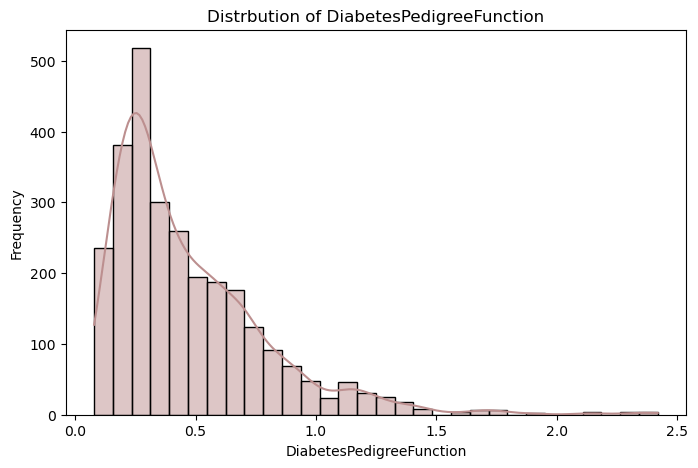

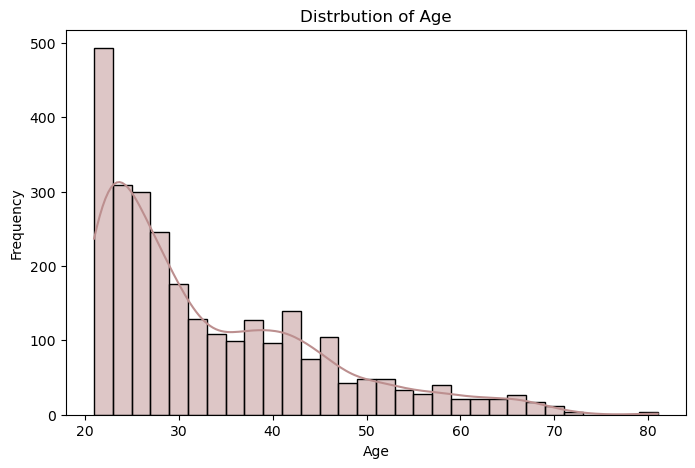

In [20]:
# Create Histogram with kde
def plot_histograms(df, numeric_coloumns):
    for column in numeric_coloumns:
        plt.figure(figsize=(8, 5))
        sns.histplot(df[column], bins=30, kde=True, color='rosybrown')
        plt.title(f"Distrbution of {column}")
        plt.xlabel(column)
        plt.ylabel("Frequency")
        plt.show()

plot_histograms(df, numeric_coloumns)

### 4.3. Outliers

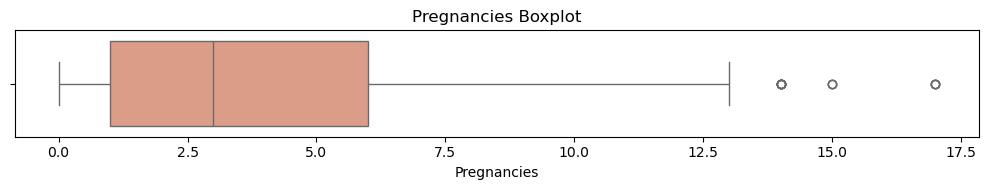

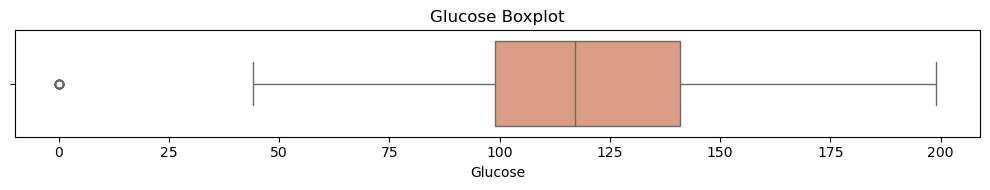

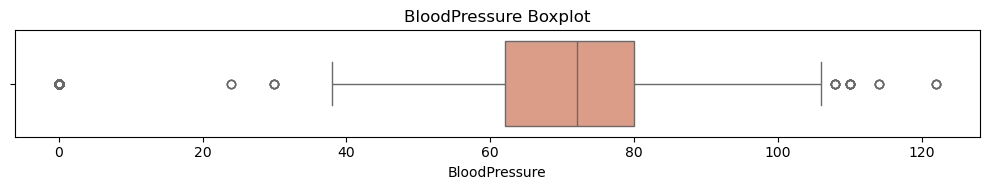

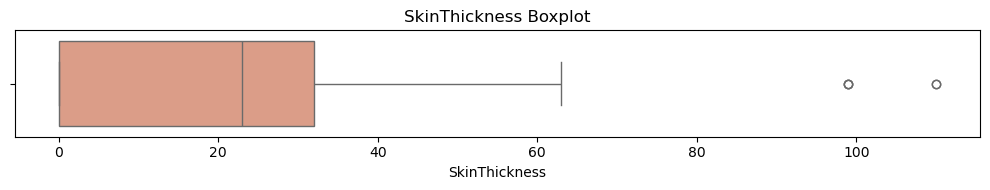

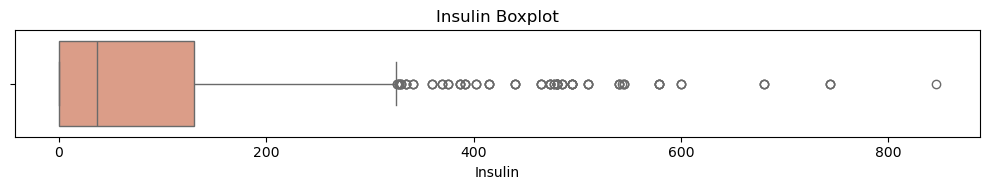

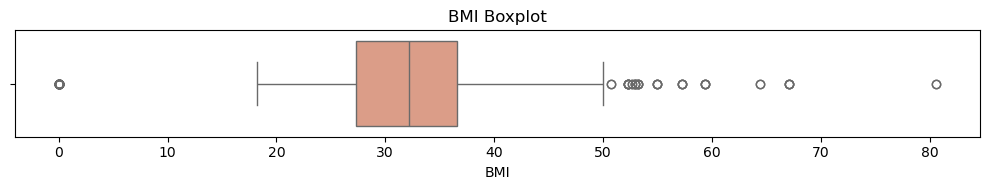

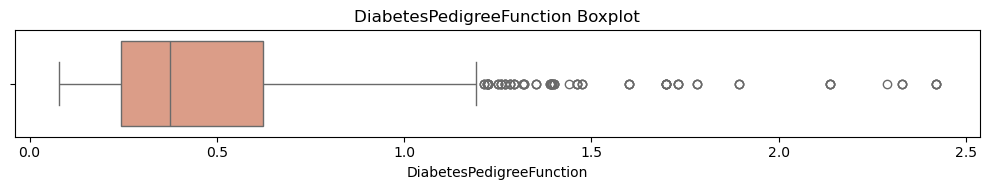

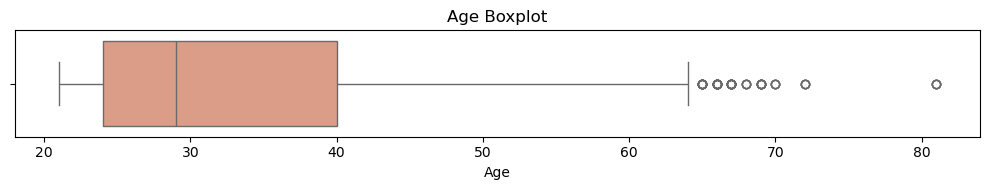

In [67]:
# Function to perform univariate analysis for numeric_coloumns
def univariate_analysis (df, column, title) :
    plt.figure(figsize=(10, 2))
    # Create boxplot with spacify color
    sns.boxplot(x=df[column], color='darksalmon')
    plt.title(f"{title} Boxplot")
    plt.tight_layout()
    plt.show()

    
for column in numeric_coloumns:
    univariate_analysis(df, column, column)

In [22]:
def detect_outliers_all_columns(df, numeric_coloumns):
    outlier_summary = {}
    
    for col in numeric_coloumns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_count = len(outliers)
        outlier_percentage = (outlier_count / len(df)) * 100
        
        outlier_summary[col] = {
            'count': outlier_count,
            'percentage': outlier_percentage,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound
        }
    
    return outlier_summary

# Check all numerical columns
numeric_coloumns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
outlier_info = detect_outliers_all_columns(df, numeric_coloumns)

for col, info in outlier_info.items():
    print(f"{col}: {info['count']} outliers ({info['percentage']:.1f}%)")

Pregnancies: 16 outliers (0.6%)
Glucose: 18 outliers (0.7%)
BloodPressure: 158 outliers (5.7%)
SkinThickness: 5 outliers (0.2%)
Insulin: 103 outliers (3.7%)
BMI: 77 outliers (2.8%)
DiabetesPedigreeFunction: 97 outliers (3.5%)
Age: 64 outliers (2.3%)


### 4.4. Correlation Matrix

In [23]:
corr_matrix = df[numeric_coloumns].corr()
print(corr_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.122839       0.147253      -0.068673   
Glucose                      0.122839  1.000000       0.142095       0.061023   
BloodPressure                0.147253  0.142095       1.000000       0.201167   
SkinThickness               -0.068673  0.061023       0.201167       1.000000   
Insulin                     -0.075734  0.323445       0.087823       0.445345   
BMI                          0.018761  0.225308       0.281560       0.393494   
DiabetesPedigreeFunction    -0.027731  0.127195       0.048471       0.179830   
Age                          0.540805  0.256958       0.238684      -0.111895   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.075734  0.018761                 -0.027731   
Glucose                   0.323445  0.225308                  0.127195   
BloodPressure             0.087823  0.281560    

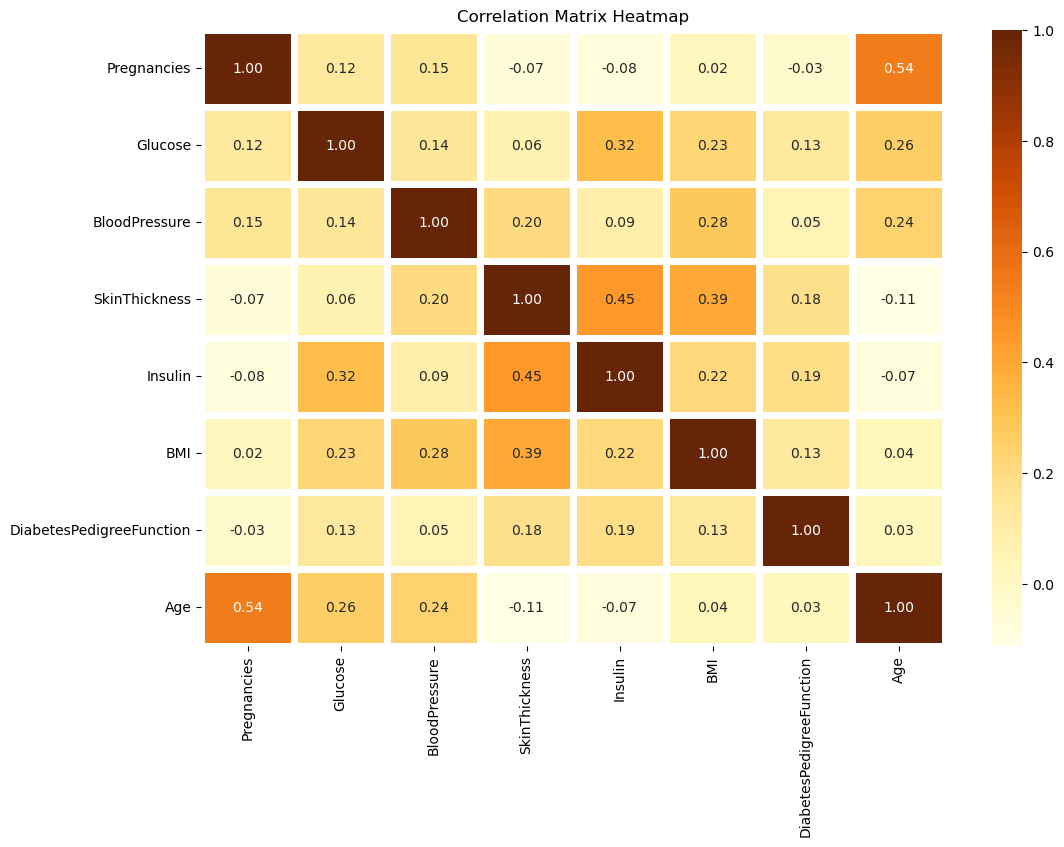

In [24]:
# Heatmap 
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap="YlOrBr", fmt='.2f', linewidths=5)
plt.title("Correlation Matrix Heatmap")
plt.show()

##### Looking at this correlation matrix heatmap for your diabetes dataset, here are the key insights:
* Strong Positive Correlations
1. Pregnancies & Age (0.54) - This is the strongest correlation, which makes biological sense as women tend to have more pregnancies as they age.
2. SkinThickness & Insulin (0.45) - Moderate correlation suggesting these physiological measurements are related, possibly indicating metabolic connections.
3. SkinThickness & BMI (0.39) - Expected relationship as both are body composition indicators.

* Notable Moderate Correlations
1. Glucose & Insulin (0.32) - Positive correlation makes sense physiologically, as insulin response is related to glucose levels.
2. Glucose & Age (0.26) - Older individuals tend to have higher glucose levels.
3. BloodPressure & BMI (0.28) - Common medical relationship where higher BMI often correlates with higher blood pressure.

* Weak/Negative Correlations
1. Age & SkinThickness (-0.11) - Slight negative correlation, possibly due to age-related changes in skin.
2. Pregnancies & Insulin (-0.08) - Very weak negative correlation.


## Step 5: Model Training & Evaluation

In [25]:
# Import Libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [26]:
# Set Target
y = df['Outcome']
X = df.drop(['Id', 'Outcome'], axis=1)

In [27]:
# Make train test spilt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 5.1. Logistic Regression

In [28]:
# Train the model
Log_Reg_Class = LogisticRegression(solver='saga', max_iter=100, random_state=42)
Log_Reg_Class.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='saga')

In [29]:
# Make predictions
y_pred = Log_Reg_Class.predict(X_test)

In [30]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       363
           1       0.58      0.27      0.37       191

    accuracy                           0.68       554
   macro avg       0.64      0.58      0.58       554
weighted avg       0.66      0.68      0.64       554


Confusion Matrix:
[[326  37]
 [140  51]]


In [31]:
Log_Reg_Acc = accuracy_score(y_pred, y_test)
print('Logistc Regression Accuracy: {:.2f}%' . format(Log_Reg_Acc *100))

Logistc Regression Accuracy: 68.05%


### 5.2. SVC (Support Vector Classifier)

In [32]:
# Train the model
SVC_Class = SVC(random_state=42)
SVC_Class.fit(X_train, y_train)

SVC(random_state=42)

In [33]:
# Make predictions
y_pred = SVC_Class.predict(X_test)

In [34]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83       363
           1       0.74      0.48      0.58       191

    accuracy                           0.76       554
   macro avg       0.75      0.70      0.71       554
weighted avg       0.76      0.76      0.75       554


Confusion Matrix:
[[330  33]
 [ 99  92]]


In [35]:
SVC_Acc = accuracy_score(y_pred, y_test)
print('SVC Accuracy: {:.2f}%' . format(SVC_Acc *100))

SVC Accuracy: 76.17%


### 5.3. Naive Bayes

In [36]:
# Train the model
NB_Class = GaussianNB()
NB_Class.fit(X_train, y_train)

GaussianNB()

In [37]:
# Make predictions
y_pred = NB_Class.predict(X_test)

In [38]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.84      0.82       363
           1       0.66      0.58      0.62       191

    accuracy                           0.75       554
   macro avg       0.73      0.71      0.72       554
weighted avg       0.75      0.75      0.75       554


Confusion Matrix:
[[306  57]
 [ 80 111]]


In [39]:
NB_Acc = accuracy_score(y_pred, y_test)
print('GaussianNB Accuracy: {:.2f}%' . format(NB_Acc *100))

GaussianNB Accuracy: 75.27%


### 5.4. KNN (K-Nearest Neighbors)

In [40]:
# Train the model
KNN_Class = KNeighborsClassifier(n_neighbors=i)
KNN_Class.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=7)

In [41]:
# Make predictions
y_pred = KNN_Class.predict(X_test)

In [42]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       363
           1       0.73      0.65      0.69       191

    accuracy                           0.80       554
   macro avg       0.78      0.76      0.77       554
weighted avg       0.79      0.80      0.79       554


Confusion Matrix:
[[317  46]
 [ 67 124]]


In [43]:
KNN_Acc = accuracy_score(y_pred, y_test)
print("KNN best Accuracy: {:.2f}%" .format(KNN_Acc *100))

KNN best Accuracy: 79.60%


### 5.5. Decision Tree

In [44]:
# Train the model
DT_Class = DecisionTreeClassifier(random_state=42)
DT_Class.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [45]:
# Make predictions
y_pred = DT_Class.predict(X_test)

In [46]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       363
           1       0.98      0.98      0.98       191

    accuracy                           0.99       554
   macro avg       0.99      0.99      0.99       554
weighted avg       0.99      0.99      0.99       554


Confusion Matrix:
[[360   3]
 [  3 188]]


In [47]:
DT_Acc = accuracy_score(y_pred, y_test)
print("Decision Tree best Accuracy: {:.2f}%" .format(DT_Acc *100))

Decision Tree best Accuracy: 98.92%


### 5.6. Random Forest

In [48]:
# Train the model
RF_Class = RandomForestClassifier(n_estimators=300, random_state=42)
RF_Class.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [49]:
# Make predictions
y_pred = RF_Class.predict(X_test)

In [50]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       363
           1       1.00      0.99      0.99       191

    accuracy                           1.00       554
   macro avg       1.00      0.99      1.00       554
weighted avg       1.00      1.00      1.00       554


Confusion Matrix:
[[363   0]
 [  2 189]]


In [51]:
RF_Acc = accuracy_score(y_pred, y_test)
print('Random Forest Accuracy: {:.2f}%' . format(RF_Acc *100))

Random Forest Accuracy: 99.64%


### 5.7. XGB Classifier

In [52]:
# Create and train XGBClassifier
xgb_model = XGBClassifier(
    n_estimators=100,        # Number of boosting rounds
    max_depth=6,            # Maximum depth of trees
    learning_rate=0.1,      # Step size shrinkage
    subsample=0.8,          # Fraction of samples for each tree
    colsample_bytree=0.8,   # Fraction of features for each tree
    random_state=42,
    eval_metric='logloss'   # Evaluation metric
)


In [53]:
# Train the model
print("\nTraining XGBClassifier...")
xgb_model.fit(X_train, y_train)


Training XGBClassifier...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [54]:
# Make predictions
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)

In [55]:
# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       363
           1       0.99      0.95      0.97       191

    accuracy                           0.98       554
   macro avg       0.98      0.97      0.98       554
weighted avg       0.98      0.98      0.98       554


Confusion Matrix:
[[361   2]
 [  9 182]]


In [56]:
XGB_Acc = accuracy_score(y_pred, y_test)
print('GX Accuracy: {:.2f}%' . format(XGB_Acc *100))

GX Accuracy: 98.01%


### Summery of Model Evaluation

In [57]:
models=pd.DataFrame({
    'Models':['Logistic Regression','SVC', 'Naive Bayes', 'KNN', 'Decision Tree', 'Random Forest', 'XGB' ],
    'Accuracy':[Log_Reg_Acc, SVC_Acc, NB_Acc, KNN_Acc, DT_Acc, RF_Acc, XGB_Acc ]})
models.sort_values(by='Accuracy',ascending=False)

,Models,Accuracy
5,Random Forest,0.996390
4,Decision Tree,0.989170
6,XGB,0.980144
3,KNN,0.796029
1,SVC,0.761733
2,Naive Bayes,0.752708
0,Logistic Regression,0.680505


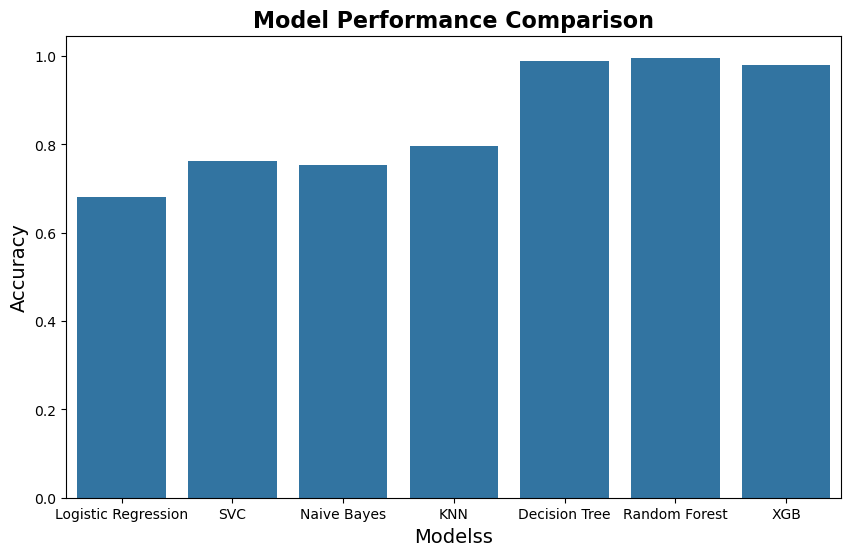

In [58]:
# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Models', y='Accuracy', data=models)

# Add labels and title
plt.xlabel('Modelss', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Performance Comparison', fontsize=16, fontweight='bold')
plt.show()

**From the Accuracy scores we can clearly see that Random Forest based classifiers worked best for this dataset, which will use it next step.**

## Step 7: Model Deployment

In [59]:
# export this pipeline
import joblib
joblib.dump(RF_Class, 'Diabetes.pkl')

['Diabetes.pkl']

In [60]:
print('Training accuracy {:.4f}'.format(RF_Class.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(RF_Class.score(X_test,y_test)))

Training accuracy 1.0000
Testing accuracy 0.9964
